{'clean': [84.87, 83.99, 68.32, 83.96], 'brightness': [82.432, 81.46, 65.8, 81.608], 'contrast': [58.846, 56.016, 44.93, 58.136], 'defocus_blur': [74.688, 73.392, 56.312, 75.798], 'elastic_transform': [76.262, 74.746, 58.964, 76.298], 'fog': [68.666, 67.074, 54.758, 67.85], 'frost': [75.304, 73.7, 63.272, 74.13], 'gaussian_blur': [70.172, 68.856, 52.26, 72.042], 'gaussian_noise': [66.68, 66.432, 57.752, 68.042], 'glass_blur': [64.618, 63.644, 58.174, 64.996], 'impulse_noise': [57.578, 57.662, 47.382, 60.25], 'jpeg_compression': [80.692, 80.012, 64.46, 79.676], 'motion_blur': [66.522, 65.602, 57.18, 67.42], 'pixelate': [80.706, 80.102, 63.374, 80.086], 'saturate': [77.668, 76.75, 61.278, 76.682], 'shot_noise': [70.932, 70.63, 61.536, 71.598], 'snow': [74.346, 73.254, 61.604, 73.194], 'spatter': [74.324, 73.424, 60.52, 73.762], 'speckle_noise': [70.57, 70.628, 61.646, 71.47], 'zoom_blur': [70.192, 69.546, 52.062, 72.96]}


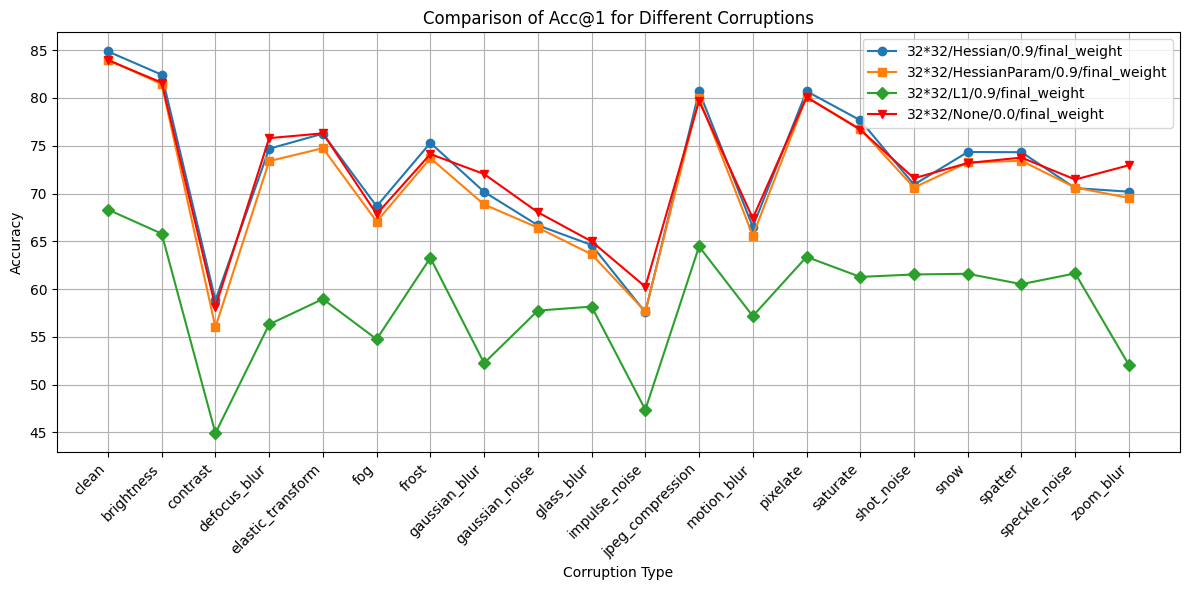

In [8]:
import matplotlib.pyplot as plt
import os
import glob
Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100', 'logs/debug/ResNet18/CIFAR10/None/0.0001/42/0.5/20250109151522/test/final_weight']
paths = glob.glob('logs/32*32/ResNet18/CIFAR10/*/0.0001/42/0.9/*/test/final_weight')
paths.append('logs/32*32/ResNet18/CIFAR10/None/0.0001/42/0.0/20250117091005/test/final_weight')

for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    # Acc1 = []
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))
Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
print(Acc1_dict)
# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[1]+'/'+paths[i].split('/')[4]+'/'+paths[i].split('/')[7]+'/'+paths[i].split('/')[10]), linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[1]+'/'+paths[i+1].split('/')[4]+'/'+paths[i+1].split('/')[7]+'/'+paths[i+1].split('/')[10]), color='r', linestyle='-')

plt.xlabel('Corruption Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Acc@1 for Different Corruptions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('corruption_comparison.png')
plt.show()